# PC_Parts  Image classification using CNN:-

In [1]:
#import library:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = r"D:\Dataset files_ML\AI_project_Datasets\pc_parts"

In [3]:
train_dir

'D:\\Dataset files_ML\\AI_project_Datasets\\pc_parts'

In [4]:
len(train_dir)

48

In [5]:
#create an ImageDataGenerator object for data augmentation:
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2   # Use 20% of the data for validation
)

In [6]:
width, heigth = 256, 256

In [7]:
#create data generator for the training and test sets:
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(width, heigth),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

Found 2629 images belonging to 14 classes.


In [8]:
test_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(width, heigth),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 650 images belonging to 14 classes.


In [9]:
#create an CNN  sequential model:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(width, heigth, 3)),
    MaxPool2D((2,2)),
    
    Conv2D(64, (3,3), activation="relu"),
    MaxPool2D((2,2)),
    
    Conv2D(128, (3,3), activation="relu"),
    MaxPool2D((3,3)),
    
    Conv2D(128, (3,3), activation="relu"),
    MaxPool2D((3,3)),
    
    Flatten(),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(14, activation="softmax")
])

In [10]:
#compile the model:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
#Train the model:
history = model.fit(
    train_generator,
    epochs=50,
    batch_size=32,
    validation_data=test_generator
)

Epoch 1/50


83/83 [==============================] - 249s 3s/step - loss: 2.6302 - accuracy: 0.0848 - val_loss: 2.6153 - val_accuracy: 0.0908
Epoch 2/50
83/83 [==============================] - 254s 3s/step - loss: 2.6067 - accuracy: 0.1019 - val_loss: 2.5319 - val_accuracy: 0.1262
Epoch 3/50
83/83 [==============================] - 255s 3s/step - loss: 2.4837 - accuracy: 0.1483 - val_loss: 2.4120 - val_accuracy: 0.1400
Epoch 4/50
83/83 [==============================] - 260s 3s/step - loss: 2.4353 - accuracy: 0.1658 - val_loss: 2.3804 - val_accuracy: 0.2031
Epoch 5/50
83/83 [==============================] - 226s 3s/step - loss: 2.3235 - accuracy: 0.2145 - val_loss: 2.2834 - val_accuracy: 0.2385
Epoch 6/50
83/83 [==============================] - 205s 2s/step - loss: 2.2504 - accuracy: 0.2522 - val_loss: 2.2120 - val_accuracy: 0.2631
Epoch 7/50
83/83 [==============================] - 200s 2s/step - loss: 2.1519 - accuracy: 0.2929 - val_loss: 2.1152 - val_accuracy: 0.2985
Epoch 8/50


In [12]:
import matplotlib.pyplot as plt 

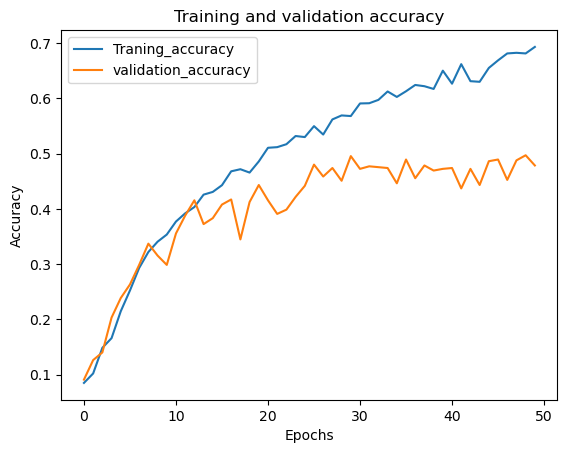

In [13]:
#plot training and validation accuracy:
plt.plot(history.history["accuracy"], label="Traning_accuracy")
plt.plot(history.history["val_accuracy"], label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

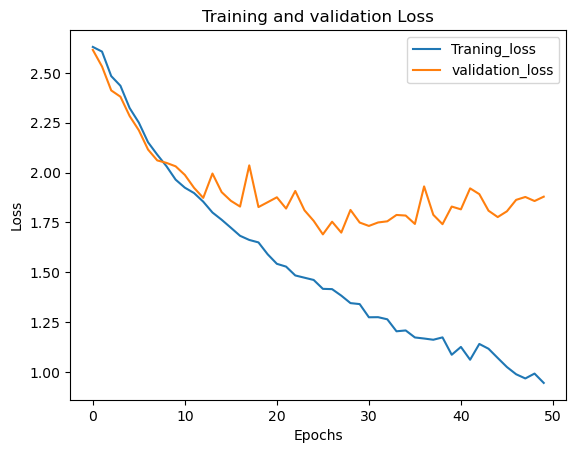

In [14]:
#plot training and validation loss:
plt.plot(history.history["loss"], label="Traning_loss")
plt.plot(history.history["val_loss"], label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [15]:
#Get the class names and indices from the test generator:-
class_names = test_generator.class_indices
classes = {value:key for key, value in class_names.items()}
print("PC_Parts class names:-", classes)

PC_Parts class names:- {0: 'cables', 1: 'case', 2: 'cpu', 3: 'gpu', 4: 'hdd', 5: 'headset', 6: 'keyboard', 7: 'microphone', 8: 'monitor', 9: 'motherboard', 10: 'mouse', 11: 'ram', 12: 'speakers', 13: 'webcam'}


In [16]:
from tensorflow.keras.preprocessing import image

In [42]:
#Define the path to the image file:
image_path = r"D:\Dataset files_ML\AI_project_Datasets\pc_parts\case/5.jpg"

In [43]:
#Load the image and resize it to the target_size:
Image = image.load_img(image_path, target_size=(width, heigth))

In [44]:
#convert the image to as numpy array and normlize it:
image_arr = image.img_to_array(Image)

In [45]:
image_arr = np.expand_dims(image_arr, axis=0)

In [46]:
image_arr = image_arr / 255

In [47]:
#Make a prediction using the model:
predict = model.predict(image_arr)

1/1 [==============================] - 0s 78ms/step


In [48]:
#To find the predict class index:
predicted_class = np.argmax(predict)
predicted_class 

1

In [49]:
#print the predict class:
print("The predicted class of the PC_parts image is:-", classes[predicted_class])

The predicted class of the PC_parts image is:- case


In [54]:
image_path_1 = r"D:\Dataset files_ML\AI_project_Datasets\pc_parts\motherboard/24.jpg"

In [55]:
Image = image.load_img(image_path_1, target_size=(width, heigth))
image_arr = image.img_to_array(Image)
image_arr = np.expand_dims(image_arr, axis=0)
image_arr = image_arr / 255

In [56]:
#predict class:
predict1 = model.predict(image_arr)

1/1 [==============================] - 0s 71ms/step


In [57]:
#find 2nd predict class index: 
predicted_class = np.argmax(predict1)
predicted_class

9

In [58]:
#predict class name:
print("The predicted class of the PC_parts image is:-", classes[predicted_class]) 

The predicted class of the PC_parts image is:- motherboard


# In Summary:-

The pc_parts Convolutional Neural Network (CNN) models in both graphs show good potential for classification, achieving accuracy/loss and also validation accuracy.

However, further evaluation on a larger dataset is recommended for confirmation. Using graph it can show the Training, validation accuracy and Training, validation Loss. While in train the model it can 50 epochs only, but the accuracy is definetly increases / and loss also decreses, So overall result is teh pc_parts CNN model is perfectly train/test.

And Finally, :- Trained CNN model demonstrates promising performance on [dataset], achieving [accuracy/loss] of [value] on validation data with limited overfitting potential. Further evaluation on a larger dataset is recommended.